### Tidy Tuesday 2025 Week 3 - Himalayan Ranges

Hello, This my first notebook with the work on Tidy Tuesday 2025 Week 3 studying Himalayan Ranges using python. The idea is to practice the pandas dataframe manipulation and plotting the data by solving some of the tasks mentioned in the Tidy Tuesday Challenge for the Himalayan Mountanerring Expeditions. Primarily the notebook will be about loading the data and doing some exploratory data analysis. 

So, lets get on with the game !!!

#### 1. Import Libraries - Read Data

As a first let us import the libraries pandas, numpy, matplotlib and seaborn. These will be our data frame and plotting libraries that we will use for this analysis. Then let us read the data. The data consists of two data files one with the data on the peaks of the Himalayas and the other with the expeditions on these peaks. The data frames are accordingly named as peaks_tidy and exped_tidy. 

In [88]:
# Import the libraries ------------------------------------------
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore") # to ignore warnings in the whole notebook

In [89]:
# Load the data ------------------------------------------
exped_tidy = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-01-21/exped_tidy.csv", encoding="ISO-8859-1")
peaks_tidy = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-01-21/peaks_tidy.csv", encoding="ISO-8859-1")

Now having read the file and loaded into a pandas dataframe, we know want see the first few and last rows of the data frames using head and tail functions

In [90]:
# Check the first 5 rows ------------------------------------------
exped_tidy.head(5)

,EXPID,PEAKID,YEAR,SEASON,SEASON_FACTOR,HOST,HOST_FACTOR,ROUTE1,ROUTE2,ROUTE3,...,ACCIDENTS,ACHIEVMENT,AGENCY,COMRTE,STDRTE,PRIMRTE,PRIMMEM,PRIMREF,PRIMID,CHKSUM
0,EVER20101,EVER,2020,1,Spring,2,China,N Col-NE Ridge,NaN,NaN,...,NaN,NaN,Holy Mountain Adventure,True,True,False,False,False,NaN,2465291
1,EVER20102,EVER,2020,1,Spring,2,China,N Col-NE Ridge,NaN,NaN,...,NaN,NaN,NaN,True,True,False,False,False,NaN,2465292
2,EVER20103,EVER,2020,1,Spring,2,China,N Col-NE Ridge,NaN,NaN,...,NaN,NaN,Holy Mountain Adventure,True,True,False,False,False,NaN,2465293
3,AMAD20301,AMAD,2020,3,Autumn,1,Nepal,SW Ridge,NaN,NaN,...,NaN,NaN,Seven Summit Treks,True,False,False,False,False,NaN,2463299
4,AMAD20302,AMAD,2020,3,Autumn,1,Nepal,SW Ridge,NaN,NaN,...,NaN,NaN,Himalayan Guides,True,False,False,False,False,NaN,2463299


In [91]:
# Check the first 5 rows ------------------------------------------
peaks_tidy.head(5)

,PEAKID,PKNAME,PKNAME2,LOCATION,HEIGHTM,HEIGHTF,HIMAL,HIMAL_FACTOR,REGION,REGION_FACTOR,...,PEAKMEMO,PYEAR,PSEASON,PEXPID,PSMTDATE,PCOUNTRY,PSUMMITERS,PSMTNOTE,REFERMEMO,PHOTOMEMO
0,AMAD,Ama Dablam,Amai Dablang,Khumbu Himal,6814,22356,12,Khumbu,2,Khumbu-Rolwaling-Makalu,...,8.0,1961.0,1,AMAD61101,Mar 13,"New Zealand, USA, UK","Mike Gill, Wally Romanes, Barry Bishop, Michae...",NaN,NaN,13.0
1,AMPG,Amphu Gyabjen,Amphu Gyabien,Khumbu Himal (N of Ama Dablam),5630,18471,12,Khumbu,2,Khumbu-Rolwaling-Makalu,...,20.0,1953.0,1,AMPG53101,Apr 11,UK,"John Hunt, Tom Bourdillon",NaN,NaN,NaN
2,ANN1,Annapurna I,NaN,Annapurna Himal,8091,26545,1,Annapurna,5,Annapurna-Damodar-Peri,...,23.0,1950.0,1,ANN150101,Jun 03,France,"Maurice Herzog, Louis Lachenal",NaN,25.0,26.0
3,ANN2,Annapurna II,NaN,Annapurna Himal,7937,26040,1,Annapurna,5,Annapurna-Damodar-Peri,...,31.0,1960.0,1,ANN260101,May 17,"UK, Nepal","Richard Grant, Chris Bonington, Ang Nyima Sherpa",NaN,33.0,34.0
4,ANN3,Annapurna III,NaN,Annapurna Himal,7555,24787,1,Annapurna,5,Annapurna-Damodar-Peri,...,35.0,1961.0,1,ANN361101,May 06,India,"Mohan S. Kohli, Sonam Gyatso, Sonam Girmi",NaN,NaN,37.0


#### 2. EDA - Mountain Range Name v/s Climb Status 

Now let us observe the distribution of HIMAL_FACTOR against the PSTATUS/PSTATUS_FACTOR. This will give us an idea of how many peaks have 
been climbed or unclimbed for each of the Himalayan Ranges 

In [92]:
df_himal_factor_pstatus = peaks_tidy.groupby(["HIMAL_FACTOR", "PSTATUS", "PSTATUS_FACTOR"], 
                                             as_index=False)["PEAKID"].count()
df_himal_factor_pstatus

,HIMAL_FACTOR,PSTATUS,PSTATUS_FACTOR,PEAKID
0,Annapurna,1,Unclimbed,2
1,Annapurna,2,Climbed,26
2,Api/Byas Risi/Guras,1,Unclimbed,11
3,Api/Byas Risi/Guras,2,Climbed,7
4,Damodar,1,Unclimbed,1
5,Damodar,2,Climbed,26
6,Dhaulagiri,1,Unclimbed,5
7,Dhaulagiri,2,Climbed,20
8,Ganesh/Shringi,1,Unclimbed,9
9,Ganesh/Shringi,2,Climbed,11


The data looks interesting. We will now focus on applying our knowledge to create a plot showing the climbed/unclimbed count 
in the x axis and Himalayan Range in the y axis. So lets get on with it 

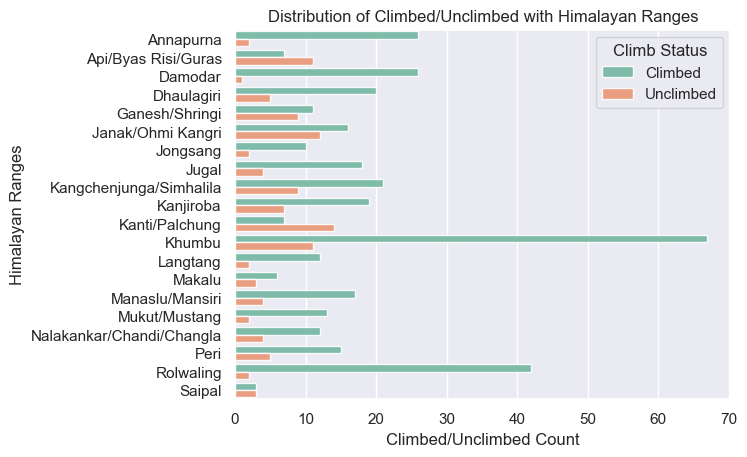

In [93]:
# plot-1.png -------------------------------------------------
sns.barplot(x="PEAKID", 
            y="HIMAL_FACTOR", 
            hue="PSTATUS_FACTOR", 
            data=df_himal_factor_pstatus, 
            palette="Set2", 
            hue_order=["Climbed", "Unclimbed"], 
            alpha=0.9)
plt.xlabel("Climbed/Unclimbed Count")
plt.ylabel("Himalayan Ranges")
plt.legend(title="Climb Status")
plt.title("Distribution of Climbed/Unclimbed with Himalayan Ranges")

plt.savefig("./plots/plot-1.png")

What we see from the above plot ? 
1. Khumbu and Rolwaling ranges have the greatest numbers of peaks that have been Climbed
2. The most unclimbed peaks are in the range "Kanti/Palchung"
3. Saipal range has equal number of Climbed and Unclimbed peaks
4. Damodar range has by far all the peaks as Climbed with very less number of peaks that are Unclimbed.


#### 3. EDA - Mountain Range - Average Peak Height 

Now let us find out the average peak height for each Himalayan Range. Then we will find out that particular Himalayan Range that has the highest peak height

In [94]:
avg_peak_heights = peaks_tidy.groupby(["HIMAL_FACTOR"], 
                                       as_index=False)["HEIGHTM"].mean().round(2).sort_values(["HEIGHTM"], 
                                                                                              ascending=False)
avg_peak_heights

,HIMAL_FACTOR,HEIGHTM
8,Kangchenjunga/Simhalila,7237.87
0,Annapurna,7058.21
6,Jongsang,7031.75
3,Dhaulagiri,6980.96
13,Makalu,6901.33
14,Manaslu/Mansiri,6789.57
11,Khumbu,6772.91
17,Peri,6735.80
1,Api/Byas Risi/Guras,6610.17
4,Ganesh/Shringi,6595.35


So here we observe the average peak heights for each Himalayan Range. Which range has the highest average peak height ? 
The first row Kanchenjunga has the highest average peak height followed by Annapurna. 

#### 4. EDA - Distribution of Peak Heights v/s Open for Expedition Status 

Now let us study the distribution of peak heights that are open versus that which are not open

In [95]:
peaks_tidy["OPEN"].value_counts().reset_index()

,OPEN,count
0,True,385
1,False,95


So, we can see that 385 peaks are open for expeditions whereas 95 peaks are not open. Now let us see the distribution with peak
height

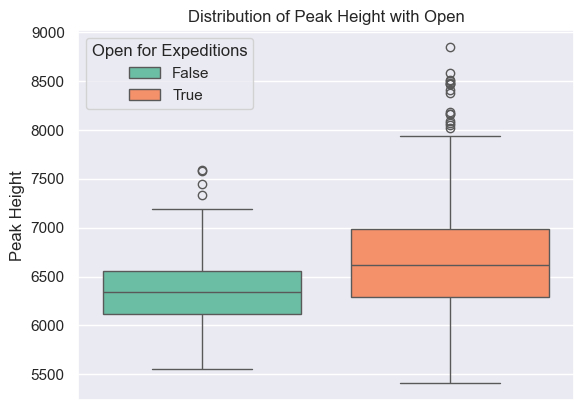

In [96]:
sns.boxplot(x="OPEN", y="HEIGHTM", data=peaks_tidy, hue="OPEN", palette="Set2", saturation=0.9)
plt.xticks([]) # remove x axis ticks
plt.xlabel("") # remove x axis labels
plt.ylabel("Peak Height")
plt.legend(title="Open for Expeditions")
plt.title("Distribution of Peak Height with Open")

plt.savefig("./plots/plot-2.png")

So we observe that the average peak height for open peaks are more than which are not open. Also open peak category has greater 
number of outliers in the higher range. Also, the distribution peak heights around the mean for not open peaks are sharper whereas
they are more spread out for peaks which are open. The average peak height for peaks which are open is around 6,600 metres whereas 
it is around 6,400 for peaks that are not open

#### 5. EDA - Distribution of Success Rates v/s Routes (1 - 4) 

Now let us study the distribution of success rates for each of the four routes

In [97]:
df_route_success = pd.concat([exped_tidy[["EXPID", "SUCCESS1"]].assign(ROUTE_NO="ROUTE-1", SUCCESS_VAL=lambda row: row["SUCCESS1"])[["EXPID", "ROUTE_NO", "SUCCESS_VAL"]], # for route 1
                              exped_tidy[["EXPID", "SUCCESS2"]].assign(ROUTE_NO="ROUTE-2", SUCCESS_VAL=lambda row: row["SUCCESS2"])[["EXPID", "ROUTE_NO", "SUCCESS_VAL"]], # for route 2
                              exped_tidy[["EXPID", "SUCCESS3"]].assign(ROUTE_NO="ROUTE-3", SUCCESS_VAL=lambda row: row["SUCCESS3"])[["EXPID", "ROUTE_NO", "SUCCESS_VAL"]], # for route 3
                              exped_tidy[["EXPID", "SUCCESS4"]].assign(ROUTE_NO="ROUTE-4", SUCCESS_VAL=lambda row: row["SUCCESS4"])[["EXPID", "ROUTE_NO", "SUCCESS_VAL"]]], # for route 4
                              axis=0)

df_route_success_groups = df_route_success.groupby(["ROUTE_NO", "SUCCESS_VAL"], 
                                                   as_index=False)["EXPID"].count().assign(COUNTS=lambda row: row["EXPID"]).drop(["EXPID"], 
                                                                                                                                 axis=1)

df_route_success_groups




,ROUTE_NO,SUCCESS_VAL,COUNTS
0,ROUTE-1,False,258
1,ROUTE-1,True,624
2,ROUTE-2,False,848
3,ROUTE-2,True,34
4,ROUTE-3,False,882
5,ROUTE-4,False,882


In [98]:
df_route_success_total = df_route_success_groups.groupby(["ROUTE_NO"], 
                                                        as_index=False)["COUNTS"].sum().assign(ROUTE_NO=lambda row: row["ROUTE_NO"], 
                                                                                               TOTAL_COUNTS=lambda row: row["COUNTS"]).drop(["COUNTS"], axis=1)


df_route_success_total


,ROUTE_NO,TOTAL_COUNTS
0,ROUTE-1,882
1,ROUTE-2,882
2,ROUTE-3,882
3,ROUTE-4,882


In [99]:
df_route_success_final = pd.merge(df_route_success_groups, df_route_success_total, on=(["ROUTE_NO"]), how="left")

df_route_success_final


,ROUTE_NO,SUCCESS_VAL,COUNTS,TOTAL_COUNTS
0,ROUTE-1,False,258,882
1,ROUTE-1,True,624,882
2,ROUTE-2,False,848,882
3,ROUTE-2,True,34,882
4,ROUTE-3,False,882,882
5,ROUTE-4,False,882,882


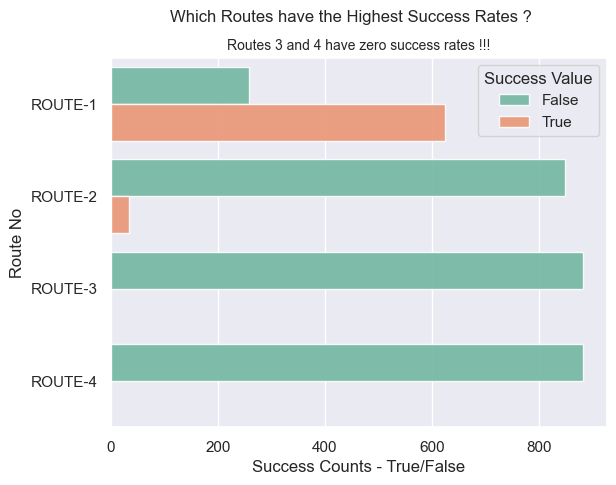

In [100]:
sns.barplot(x="COUNTS", 
            y="ROUTE_NO", 
            hue="SUCCESS_VAL", 
            data=df_route_success_final, 
            palette="Set2", 
            width=0.8, 
            alpha=0.9) 

plt.xlabel("Success Counts - True/False")
plt.ylabel("Route No")
plt.legend(title="Success Value")
plt.suptitle("Which Routes have the Highest Success Rates ?", fontsize=12)
plt.title("Routes 3 and 4 have zero success rates !!!", fontsize=10)

plt.savefig("./plots/plot-3.png")

The above plot shows that the success rate is highest for Route-1 followed by a very big drop for Route-2 and then zero success
rates for Routes 3 and 4. 

#### 6. EDA - Routes - Success - O2 Used 

We will now look into the Success values (Success 1, Success 2, Success 3 and Success 4) for each of the Routes and the impact O2 Used had on these success values. 
So, to begin with let us find the counts for each combination of values for Success and O2 Used for Route 1 

In [101]:
# Route 1 
route1_o2used_df = exped_tidy.groupby(["SUCCESS1", "O2USED"], as_index=False)["EXPID"].count().rename(columns={"EXPID": "COUNTS"}).assign(ROUTE_NO="ROUTE-1", SUCCESS=lambda row: row["SUCCESS1"]).loc[:,["ROUTE_NO", "SUCCESS", "O2USED", "COUNTS"]]
route1_o2used_df

,ROUTE_NO,SUCCESS,O2USED,COUNTS
0,ROUTE-1,False,False,213
1,ROUTE-1,False,True,45
2,ROUTE-1,True,False,260
3,ROUTE-1,True,True,364


Let us find out the same for Routes 2, 3 and 4. 

In [102]:
# Route 2
route2_o2used_df = exped_tidy.groupby(["SUCCESS2", "O2USED"], as_index=False)["EXPID"].count().rename(columns={"EXPID": "COUNTS"}).assign(ROUTE_NO="ROUTE-2", SUCCESS=lambda row: row["SUCCESS2"]).loc[:,["ROUTE_NO", "SUCCESS", "O2USED", "COUNTS"]]
route2_o2used_df

,ROUTE_NO,SUCCESS,O2USED,COUNTS
0,ROUTE-2,False,False,468
1,ROUTE-2,False,True,380
2,ROUTE-2,True,False,5
3,ROUTE-2,True,True,29


In [103]:
# Route 3 
route3_o2used_df = exped_tidy.groupby(["SUCCESS3", "O2USED"], as_index=False)["EXPID"].count().rename(columns={"EXPID": "COUNTS"}).assign(ROUTE_NO="ROUTE-3", SUCCESS=lambda row: row["SUCCESS3"]).loc[:,["ROUTE_NO", "SUCCESS", "O2USED", "COUNTS"]]
route3_o2used_df

,ROUTE_NO,SUCCESS,O2USED,COUNTS
0,ROUTE-3,False,False,473
1,ROUTE-3,False,True,409


In [104]:
# Route 4
route4_o2used_df = exped_tidy.groupby(["SUCCESS4", "O2USED"], as_index=False)["EXPID"].count().rename(columns={"EXPID": "COUNTS"}).assign(ROUTE_NO="ROUTE-4", SUCCESS=lambda row: row["SUCCESS4"]).loc[:,["ROUTE_NO", "SUCCESS", "O2USED", "COUNTS"]]
route4_o2used_df

,ROUTE_NO,SUCCESS,O2USED,COUNTS
0,ROUTE-4,False,False,473
1,ROUTE-4,False,True,409


Now we have to concatenate these 4 data frames holding the summary data for each of the 4 routes. This will give us the 
consolidated date frame to create a visualization with.  

In [105]:
route_o2used_df = pd.concat([route1_o2used_df, route2_o2used_df, route3_o2used_df, route4_o2used_df], axis=0)
route_o2used_df

,ROUTE_NO,SUCCESS,O2USED,COUNTS
0,ROUTE-1,False,False,213
1,ROUTE-1,False,True,45
2,ROUTE-1,True,False,260
3,ROUTE-1,True,True,364
0,ROUTE-2,False,False,468
1,ROUTE-2,False,True,380
2,ROUTE-2,True,False,5
3,ROUTE-2,True,True,29
0,ROUTE-3,False,False,473
1,ROUTE-3,False,True,409


With the consolidated data frame, we plot the Success Vs O2 Used distributions in a Faceted Grid plot with each Facet corresponding
to a Route. We have 4 Routes and hence we will have 4 facets to the plot. 

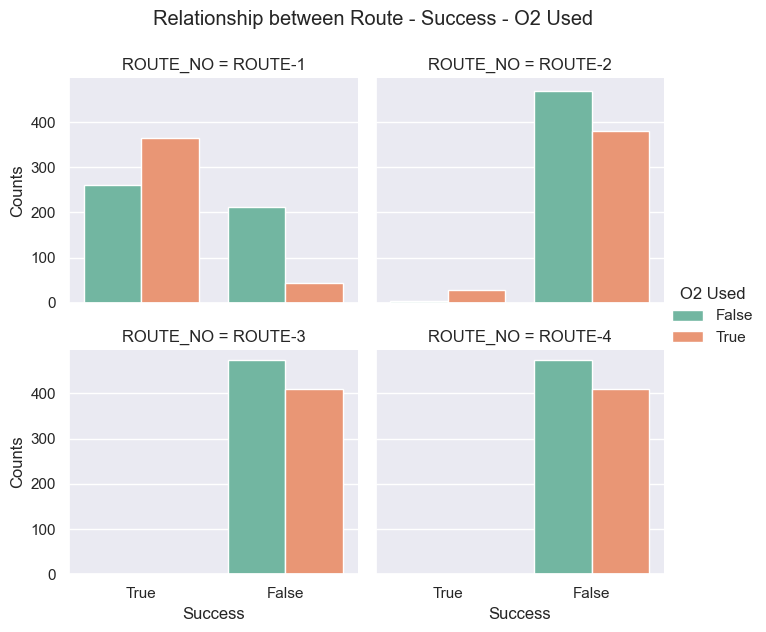

In [106]:
g=sns.FacetGrid(route_o2used_df, col="ROUTE_NO", col_wrap=2, height=3, aspect=1.15)
g.map(sns.barplot, "SUCCESS", "COUNTS", "O2USED", order=["True", "False"], dodge=True, palette="Set2").add_legend(title="O2 Used")
g.set_axis_labels("Success", "Counts")
g.fig.suptitle("Relationship between Route - Success - O2 Used", y=1.05)
plt.savefig("./plots/plot-4.png")

The above plot is a bit complicated to understand. Let us break this down for each of the Routes as below 

1. Route 1 - Where the expeditions have been a success, O2 Used was more in them than not used. Where the expeditions were a failure, most of the them did not use O2.
2. ROute 2 - Where the expeditions have been a success (there are very few successes in Route 2 in all), most of them had used O2.
3. Route 3 and Route 4 - There have been no successfull expeditions. Where the expeditions have been a failure, greater number of these expeditions  did not use O2.

So from these stats, it looks like using O2 is a predictor towards a successful expedition. Hmm... we now have a positively impacting feature that can be a predictor towards whether an expeditions ends up being a successful one. 